# Binary Cross Entropy Loss Function
This loss function is used when you want to classify your data into two possible classes - True or False.

A good example of this could be fraud detection.

You have a credit card transaction and you want to predict if it is fraudulent or good. You would train your model on a set of good and fraudulent transactions and have it output 1 for fraudulent and 0 for good.

In [124]:
# Standard set of imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.data import Dataset
import numpy as np
import matplotlib.pyplot as plt

# Training Data
We're going to generate some dummy training data. We'll generate some simple images containing a square or a circle. Our model will return true for a square and false for a circle.

In [125]:
image_width = 100
image_height = 100
epochs = 3
steps_per_epoch = 100
batch_size = 30

# Data Generator
This is an infinite generator that will generate a pair of input and outpus values.

In [126]:
def data_generator():
    i = 0
    while(True):
        if i >= 1000:
            i = 0
        # our output value will be 0 or 1
        Y = i % 2
        X = np.zeros((image_width, image_height, 1))
        
        # size of our shape
        radius = int(np.random.uniform(10,20))
        # position of our shape
        center_x = int(np.random.uniform(radius, image_width - radius))
        center_y = int(np.random.uniform(radius, image_height - radius))
        
        if Y == 0: # generate a square
            X[center_x - radius:center_x + radius, center_y - radius:center_y + radius] = 1        
        else: # generate a circle
            for x in range(-radius, radius):
                for y in range(-radius, radius):
                    if x*x + y*y <= radius*radius:
                        X[x+center_x, y+center_y] = 1
        yield X, [Y]
        i = i + 1

# Dataset
This creates a dataset that we can feed into the tensorflow fit function for training

In [127]:
train_dataset = tf.data.Dataset.from_generator(
    data_generator, 
    output_types = (tf.float32, tf.int32),
    output_shapes=((image_width, image_height, 1), (1))
)
train_dataset = train_dataset.batch(batch_size=batch_size)

# Visualising our training data
We can display a selection of images from our training data along with their labels.

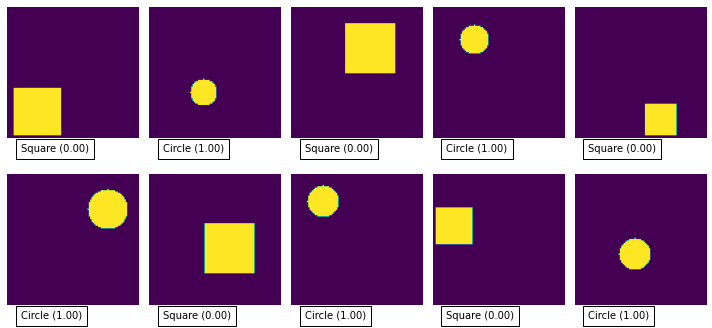

In [128]:
import itertools

def plot_images(X, Y):
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    axes = axes.flatten()
    for x, y, ax in zip(X, tf.cast(Y, tf.float32), axes):
        # show the image
        ax.imshow(x)
        # work out the label
        label = 'Circle' if y[0]>0.5 else 'Square'
        # show the label beneath the plot
        ax.text(10, image_height+10, f"{label} ({y[0]:.2f})", bbox={'facecolor': 'white', 'pad': 5})
        # turn off the axis to make the display a bit cleaner
        ax.axis("off")
    plt.tight_layout()
    plt.show()

# get a batch of images and labels from our dataset
X, Y = next(iter(train_dataset))
# and show the images along with the label - not the use of nump() to get the values from the tensor
plot_images(X, Y.numpy())

# Our very simple mode
We don't need a very complicated model for our problem, so we'll just define a small convolutional neural network with a hidden layer and an output layer.

It's important that the activation function should be `sigmoid`. This activation function will output a value between 0 and 1. We can use this value to predict how confident the model is of the example being a circle.

In [129]:
model = Sequential([
    Conv2D(8, 3, 
           padding='same',
           activation='relu',
           input_shape=(image_width, image_height, 1),
           name='conv_layer'),
    MaxPooling2D(name='max_pooling'),
    Flatten(),
    Dense(
        10,
        activation='relu',
        name='hidden_layer'
    ),
    Dense(1, activation='sigmoid', name='output')
])

# Compile our model
For our loss function we need to use `BinaryCrossentropy`.

Cross entropy quantifies the difference between two probability distribution.

We have a binary distribution (True or False) so we use binary cross-entropy to compare the output from our model with the true distribution.

In [130]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_layer (Conv2D)          (None, 100, 100, 8)       80        
_________________________________________________________________
max_pooling (MaxPooling2D)   (None, 50, 50, 8)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 20000)             0         
_________________________________________________________________
hidden_layer (Dense)         (None, 10)                200010    
_________________________________________________________________
output (Dense)               (None, 1)                 11        
Total params: 200,101
Trainable params: 200,101
Non-trainable params: 0
_________________________________________________________________


# Fitting our model
We can now fit our model to the data. We have a very simple model to solve so we don't need to run for very many epochs to get a good fit.

In [131]:
history = model.fit(
    train_dataset,
    steps_per_epoch=100,
    epochs=4
)

Epoch 1/4
100/100 [==============================] - 5s 46ms/step - loss: 0.6513 - accuracy: 0.6137
Epoch 2/4
100/100 [==============================] - 5s 46ms/step - loss: 0.4283 - accuracy: 0.8267
Epoch 3/4
100/100 [==============================] - 5s 46ms/step - loss: 0.0998 - accuracy: 0.9927
Epoch 4/4
100/100 [==============================] - 5s 45ms/step - loss: 0.0288 - accuracy: 0.9997


# Testing our model with some examples
You should end up with an accuracy approaching or equal to 100%. This is a very easy problem to solve!

Let's generate some more examples and see what the output of the model is.

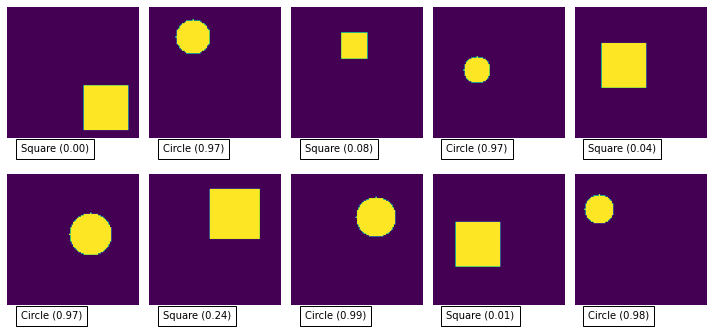

In [136]:
# get a batch of samples from the dataset
X, _ = next(iter(train_dataset))
# ask the model to predict the output for our samples
predicted_Y = model.predict(X.numpy())
# show the images along with the predicted value
plot_images(sample_training_images, predicted)

Did your model work? Some interesting experiments to try:
* How small can you make your model before it fails?
* What happens if you feed a completely diffetent shape into the model?
* What happens if you feed a blank image into the model?
    